*Dependency installation*

Install cx_Oracle python package with anaconda prompt
```
conda install -c anaconda cx_oracle
```

In [2]:
import cx_Oracle as db

#database user credentials
user="system"
password="izac"

#creating connection string
connectionString = user+'/'+password+'@localhost/orcl'

#connection established with database
con = db.connect(connectionString)
cursor = con.cursor()
print("connection established with database")

connection established with database


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#import Mc'DonaldsMenu.csv file and create a dataframe
data = pd.read_csv("""./Mc'DonaldsMenu.csv""")
dataFrame = pd.DataFrame(data)

#list of dataFrame column headers
dataFrameHeaders=[
    'Category',
    'Item',
    'Serving Size',
    'Calories',
    'Calories from Fat',
    'Total Fat',
    'Total Fat (% Daily Value)',
    'Saturated Fat',
    'Saturated Fat (% Daily Value)',
    'Trans Fat',
    'Cholesterol',
    'Cholesterol (% Daily Value)',
    'Sodium',
    'Sodium (% Daily Value)',
    'Carbohydrates',
    'Carbohydrates (% Daily Value)',
    'Dietary Fiber',
    'Dietary Fiber (% Daily Value)',
    'Sugars',
    'Protein',
    'Vitamin A (% Daily Value)',
    'Vitamin C (% Daily Value)',
    'Calcium (% Daily Value)',
    'Iron (% Daily Value)'
]
print(dataFrameHeaders)
print("csv successfully imported")

['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
csv successfully imported


In [4]:
# A map for csv column headers and column names in database table
tableNameMap={
    'Category':'category',
    'Item':'item',
    'Serving Size':'serving_size',
    'Calories':'calories',
    'Calories from Fat':'calories_fat',
    'Total Fat':'total_fat',
    'Total Fat (% Daily Value)':'total_fat_percent',
    'Saturated Fat':'saturated_fat',
    'Saturated Fat (% Daily Value)':'saturated_fat_percent',
    'Trans Fat':'trans_fat',
    'Cholesterol':'cholesterol',
    'Cholesterol (% Daily Value)':'cholesterol_percent',
    'Sodium':'sodium',
    'Sodium (% Daily Value)':'sodium_percent',
    'Carbohydrates':'carbohydrates',
    'Carbohydrates (% Daily Value)':'carbohydrates_percent',
    'Dietary Fiber':'dietary_fiber',
    'Dietary Fiber (% Daily Value)':'dietary_fiber_percent',
    'Sugars':'sugars',
    'Protein':'proteins',
    'Vitamin A (% Daily Value)':'vitamin_A_percent',
    'Vitamin C (% Daily Value)':'vitamin_C_percent',
    'Calcium (% Daily Value)':'calcium_percent',
    'Iron (% Daily Value)':'iron_percent'
}
print(tableNameMap)

{'Category': 'category', 'Item': 'item', 'Serving Size': 'serving_size', 'Calories': 'calories', 'Calories from Fat': 'calories_fat', 'Total Fat': 'total_fat', 'Total Fat (% Daily Value)': 'total_fat_percent', 'Saturated Fat': 'saturated_fat', 'Saturated Fat (% Daily Value)': 'saturated_fat_percent', 'Trans Fat': 'trans_fat', 'Cholesterol': 'cholesterol', 'Cholesterol (% Daily Value)': 'cholesterol_percent', 'Sodium': 'sodium', 'Sodium (% Daily Value)': 'sodium_percent', 'Carbohydrates': 'carbohydrates', 'Carbohydrates (% Daily Value)': 'carbohydrates_percent', 'Dietary Fiber': 'dietary_fiber', 'Dietary Fiber (% Daily Value)': 'dietary_fiber_percent', 'Sugars': 'sugars', 'Protein': 'proteins', 'Vitamin A (% Daily Value)': 'vitamin_A_percent', 'Vitamin C (% Daily Value)': 'vitamin_C_percent', 'Calcium (% Daily Value)': 'calcium_percent', 'Iron (% Daily Value)': 'iron_percent'}


In [4]:
# table creation query

query="""create table mc_donalds_menu(category varchar(100),item varchar(150), serving_size varchar(100),calories number(5),calories_fat number(5),total_fat number(5),total_fat_percent number(5),saturated_fat number(5),saturated_fat_percent number(5),trans_fat number(5),cholesterol number(5),cholesterol_percent number(5),sodium number(5),sodium_percent number(5),carbohydrates number(5),carbohydrates_percent number(5),dietary_fiber number(5),dietary_fiber_percent number(5),sugars number(5),proteins number(5),vitamin_A_percent number(5),vitamin_C_percent number(5),calcium_percent number(5),iron_percent number(5))"""

cursor.execute(query)
print("database table created successfully")

database table created successfully


After execution of above code perform following command in sql cmd

```
    desc mc_donalds_menu
```

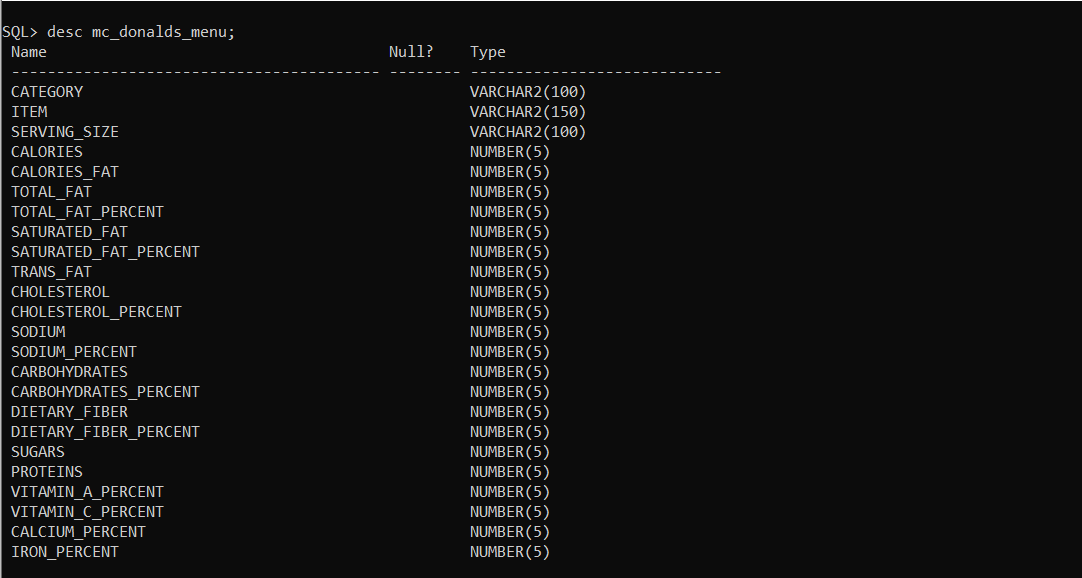

In [5]:
#insert values into database from csv

for index in dataFrame.index:
    s=""
    for factor in range(3):
        v=str(dataFrame[dataFrameHeaders[factor]][index])
        s=s+"'"+v+"'"+','
    
    for factor in range(3,23):
        v=str(dataFrame[dataFrameHeaders[factor]][index])
        s=s+v+','
    v=str(dataFrame['Iron (% Daily Value)'][index])
    s=s+v
    #print(s)
    
    baseQuery="insert into mc_donalds_menu values("
    finalQuery=baseQuery+s+")"
    print(finalQuery)
    print()
    cursor.execute(finalQuery)
    
print("done")
cursor.execute("commit")

insert into mc_donalds_menu values('Breakfast','Egg McMuffin','4.8 oz (136 g)',300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15)

insert into mc_donalds_menu values('Breakfast','Egg White Delight','4.8 oz (135 g)',250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8)

insert into mc_donalds_menu values('Breakfast','Sausage McMuffin','3.9 oz (111 g)',370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10)

insert into mc_donalds_menu values('Breakfast','Sausage McMuffin with Egg','5.7 oz (161 g)',450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15)

insert into mc_donalds_menu values('Breakfast','Sausage McMuffin with Egg Whites','5.7 oz (161 g)',400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10)

insert into mc_donalds_menu values('Breakfast','Steak & Egg McMuffin','6.5 oz (185 g)',430,210,23.0,36,9.0,46,1.0,300,100,960,40,31,10,4,18,3,26,15,2,30,20)

insert into mc_donalds_menu values('Breakfast','Bacon & Egg & Ch

In [6]:
#test the data
query="select item from mc_donalds_menu where category='Chicken & Fish'"

cursor.execute(query)

for row in cursor:
    print(row)

('Premium Crispy Chicken Classic Sandwich',)
('Premium Grilled Chicken Classic Sandwich',)
('Premium Crispy Chicken Club Sandwich',)
('Premium Grilled Chicken Club Sandwich',)
('Premium Crispy Chicken Ranch BLT Sandwich',)
('Premium Grilled Chicken Ranch BLT Sandwich',)
('Bacon Clubhouse Crispy Chicken Sandwich',)
('Bacon Clubhouse Grilled Chicken Sandwich',)
('Southern Style Crispy Chicken Sandwich',)
('McChicken',)
('Bacon Cheddar McChicken',)
('Bacon Buffalo Ranch McChicken',)
('Buffalo Ranch McChicken',)
('Premium McWrap Chicken & Bacon (Crispy Chicken)',)
('Premium McWrap Chicken & Bacon (Grilled Chicken)',)
('Premium McWrap Chicken & Ranch (Crispy Chicken)',)
('Premium McWrap Chicken & Ranch (Grilled Chicken)',)
('Premium McWrap Southwest Chicken (Crispy Chicken)',)
('Premium McWrap Southwest Chicken (Grilled Chicken)',)
('Premium McWrap Chicken Sweet Chili (Crispy Chicken)',)
('Premium McWrap Chicken Sweet Chili (Grilled Chicken)',)
('Chicken McNuggets (4 piece)',)
('Chicken McN

In [7]:
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Unnamed: 24
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,NaN


In [8]:
dataFrame.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Unnamed: 24
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,NaN


In [9]:
dataFrame.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Unnamed: 24
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,0.0
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615,NaN
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000,NaN
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000,NaN
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000,NaN
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000,NaN


In [10]:
#shape of table
dataFrame.shape
new_data = dataFrame.drop('Unnamed: 24', axis=1)

In [11]:
new_data.shape
new_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [13]:
new_data.Category.value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

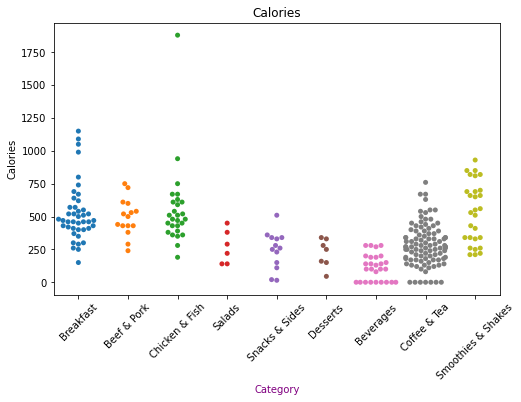

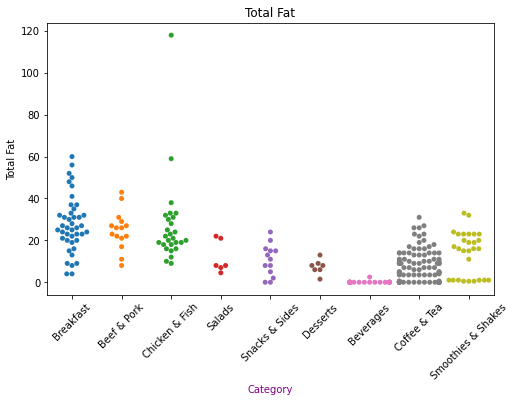

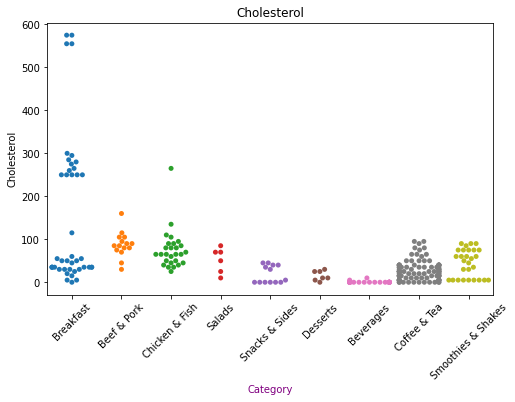

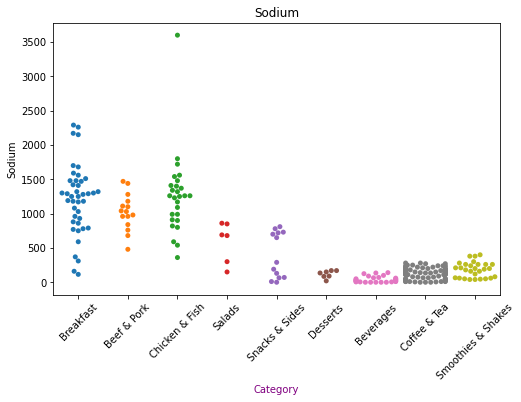

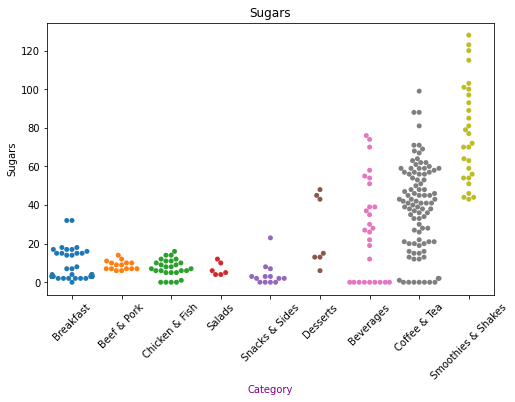

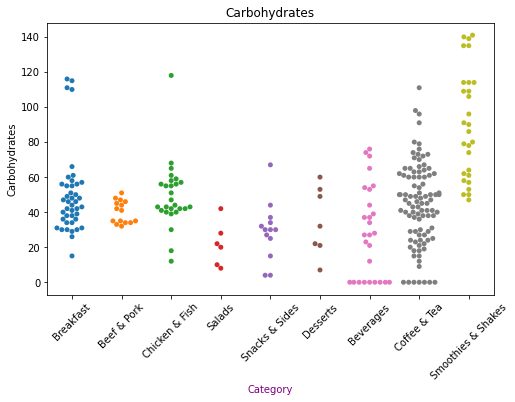

In [14]:
Category_Min = ['Calories', 'Total Fat', 'Cholesterol','Sodium', 'Sugars', 'Carbohydrates']

for i in Category_Min:
    f, ax = plt.subplots(figsize=(8, 5))
    plot = sns.swarmplot(x="Category", y=i, data=new_data , ax=ax)
    plt.setp(plot.get_xticklabels(), rotation=45)
    plt.xlabel('Category' , color="Purple")
    plt.title(i)
    plt.show()

In [15]:
by_category = pd.DataFrame({'Category':new_data['Category'].value_counts().index.tolist(),
                            'Count':new_data['Category'].value_counts().tolist(),
                            'Calories (Sum)':new_data[['Category','Calories']].groupby('Category').sum()['Calories'],
                            'Calories (Mean)':new_data[['Category','Calories']].groupby('Category').mean()['Calories']})
by_category.reset_index(drop = True)

,Category,Count,Calories (Sum),Calories (Mean)
0,Coffee & Tea,95,7410,494.000000
1,Breakfast,42,3070,113.703704
2,Smoothies & Shakes,28,22120,526.666667
3,Chicken & Fish,27,14930,552.962963
4,Beverages,27,26970,283.894737
5,Beef & Pork,15,1555,222.142857
6,Snacks & Sides,13,1620,270.000000
7,Desserts,7,14880,531.428571
8,Salads,6,3195,245.769231


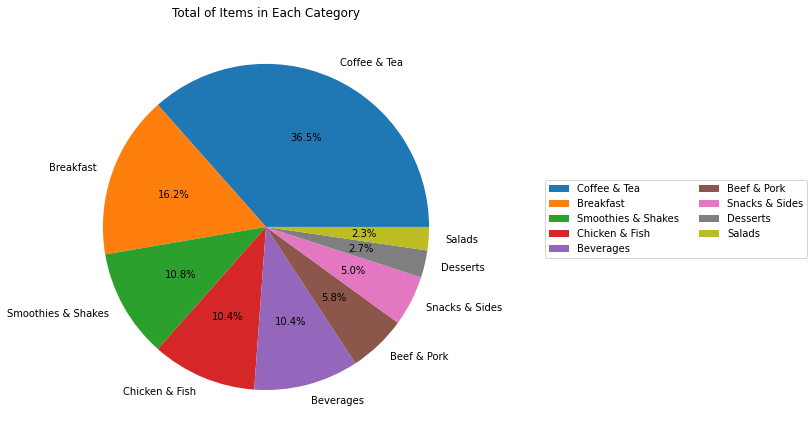

In [16]:
fig,(ax1) = plt.subplots(1)
fig.set_size_inches(15.5, 7.5)
ax1.set_title("Total of Items in Each Category")
ax1.pie(by_category['Count'],labels =by_category['Category'],autopct = '%1.1f%%')
fig.legend(by_category['Category'],ncol=2,loc=5)

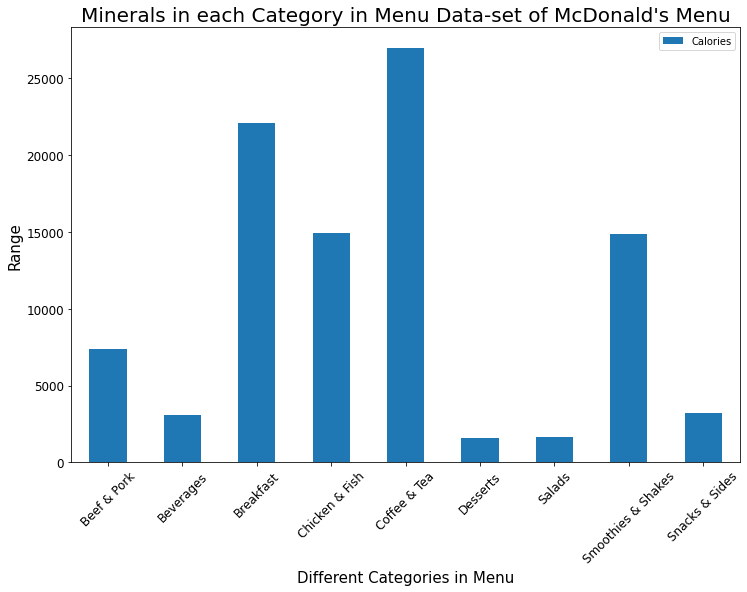

In [17]:
def Mineral_quantity(mineral):
    minerals = new_data[['Category',mineral]]
    minerals_group = minerals.groupby('Category')
    category_totals = minerals_group.sum()
    my_plot = category_totals.plot(kind='bar',figsize=(12, 8),fontsize=12 )
    plt.setp(my_plot.get_xticklabels(), rotation=45)
    my_plot.set_title("Minerals in each Category in Menu Data-set of McDonald's Menu", fontsize=20)
    my_plot.set_xlabel("Different Categories in Menu", fontsize=15)
    my_plot.set_ylabel("Range", fontsize=15)
    plt.show()
    
Mineral_quantity('Calories')


In [61]:
# fig,(ax1) = plt.subplots(1)
# fig.set_size_inches(15.5, 7.5)
# ax1.set_title("Pie-chart of Menu Category with Calories")
# ax1.pie(by_category['Count'],labels =by_category['Category'],autopct = '%1.1f%%')
# fig.legend(by_category['Category'],ncol=2,loc=8)


<AxesSubplot:xlabel='Category'>

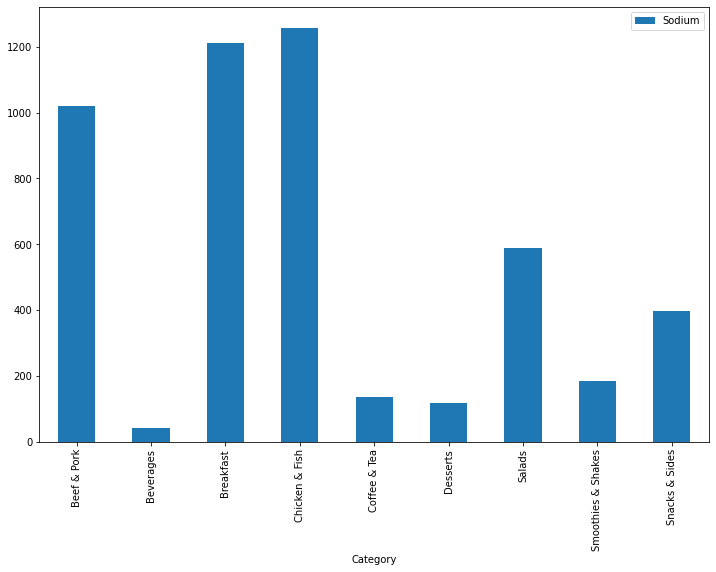

In [18]:
new_data.pivot_table('Sodium', 'Category').plot(kind='bar',figsize=(12, 8))

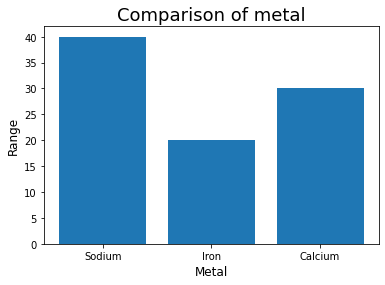

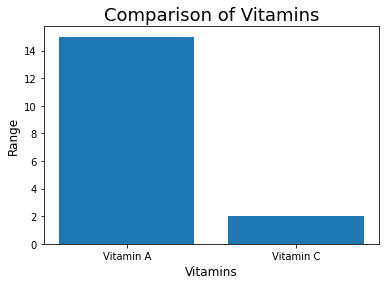

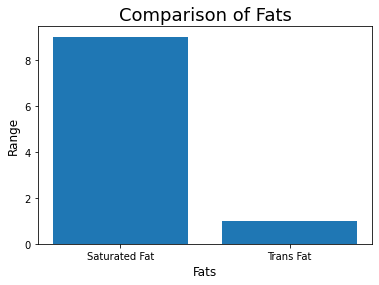

In [19]:
def item_detail(item):
    item_data = new_data['Item']
    metal_value=0
    
    for i in item_data:
        if item == i:
            metal_value = new_data[new_data['Item'] == i].index[0]
            break
        
    metal_count=[1,2,3]
    metals = ['Sodium' , 'Iron', 'Calcium']
    sodium = new_data.iloc[metal_value]['Sodium (% Daily Value)']
    iron = new_data.iloc[metal_value]['Iron (% Daily Value)']
    calcium = new_data.iloc[metal_value]['Calcium (% Daily Value)']
    per_values = []
    per_values.extend([sodium,iron,calcium])
    plt.bar(metal_count, per_values)
    plt.title('Comparison of metal',fontsize=18)
    plt.xlabel('Metal',fontsize=12)
    plt.ylabel('Range',fontsize=12)
    plt.xticks(metal_count, metals)
    plt.show() 
    
    
    vitamin_count = [1,2]
    vitamins = ['Vitamin A','Vitamin C']
    Vit_A = new_data.iloc[metal_value]['Vitamin A (% Daily Value)']
    Vit_C = new_data.iloc[metal_value]['Vitamin C (% Daily Value)']
    vit_values = []
    vit_values.extend([Vit_A,Vit_C])
    plt.bar(vitamin_count, vit_values)
    plt.title('Comparison of Vitamins',fontsize=18)
    plt.xlabel('Vitamins',fontsize=12)
    plt.ylabel('Range',fontsize=12)
    plt.xticks(vitamin_count, vitamins)
    plt.show() 
    
    fat_count = [1,2]
    fats = ['Saturated Fat','Trans Fat']
    Sat_A = new_data.iloc[metal_value]['Saturated Fat']
    Trans_C = new_data.iloc[metal_value]['Trans Fat']
    fat_values = []
    fat_values.extend([Sat_A,Trans_C])
    plt.bar(fat_count, fat_values)
    plt.title('Comparison of Fats',fontsize=18)
    plt.xlabel('Fats',fontsize=12)
    plt.ylabel('Range',fontsize=12)
    plt.xticks(fat_count, fats)
    plt.show() 

item_detail('Steak & Egg McMuffin')

In [26]:
new_data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

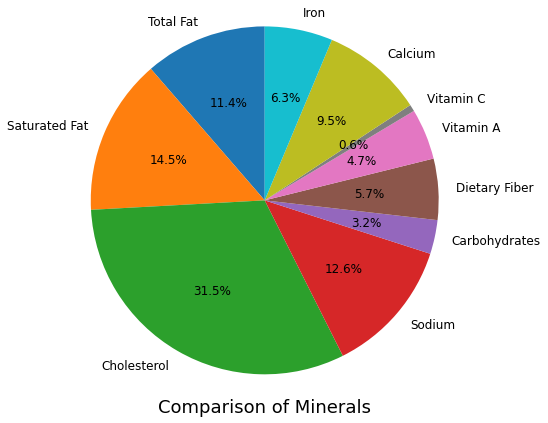

In [66]:
def item_detail_chart(item):
    item_data = new_data['Item']
    metal_value=0
    
    for i in item_data:
        if item == i:
            metal_value = new_data[new_data['Item'] == i].index[0]
            break
            
    minerals_col = ['Total Fat','Saturated Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Vitamin A','Vitamin C','Calcium','Iron']
    Total_Fat = new_data.iloc[metal_value]['Total Fat (% Daily Value)']
    Saturated_Fat = new_data.iloc[metal_value]['Saturated Fat (% Daily Value)']
    Cholesterol = new_data.iloc[metal_value]['Cholesterol (% Daily Value)']
    Sodium = new_data.iloc[metal_value]['Sodium (% Daily Value)']
    Carbohydrates = new_data.iloc[metal_value]['Carbohydrates (% Daily Value)']
    Dietary_Fiber = new_data.iloc[metal_value]['Dietary Fiber (% Daily Value)']
    Vitamin_A = new_data.iloc[metal_value]['Vitamin A (% Daily Value)']
    Vitamin_C = new_data.iloc[metal_value]['Vitamin C (% Daily Value)']
    Calcium = new_data.iloc[metal_value]['Calcium (% Daily Value)']
    Iron = new_data.iloc[metal_value]['Iron (% Daily Value)']
    per_values = []
    per_values.extend([Total_Fat,Saturated_Fat,Cholesterol,Sodium,Carbohydrates,Dietary_Fiber,Vitamin_A,Vitamin_C,Calcium,Iron])
    plt.pie(per_values, labels=minerals_col ,autopct='%1.1f%%',startangle=90 , radius=2,textprops={'fontsize': 12})
    plt.title('Comparison of Minerals',fontsize=18 ,y=-0.5)
    plt.show() 

item_detail_chart('Steak & Egg McMuffin')

In [ ]:
#item bar chart

<AxesSubplot:>

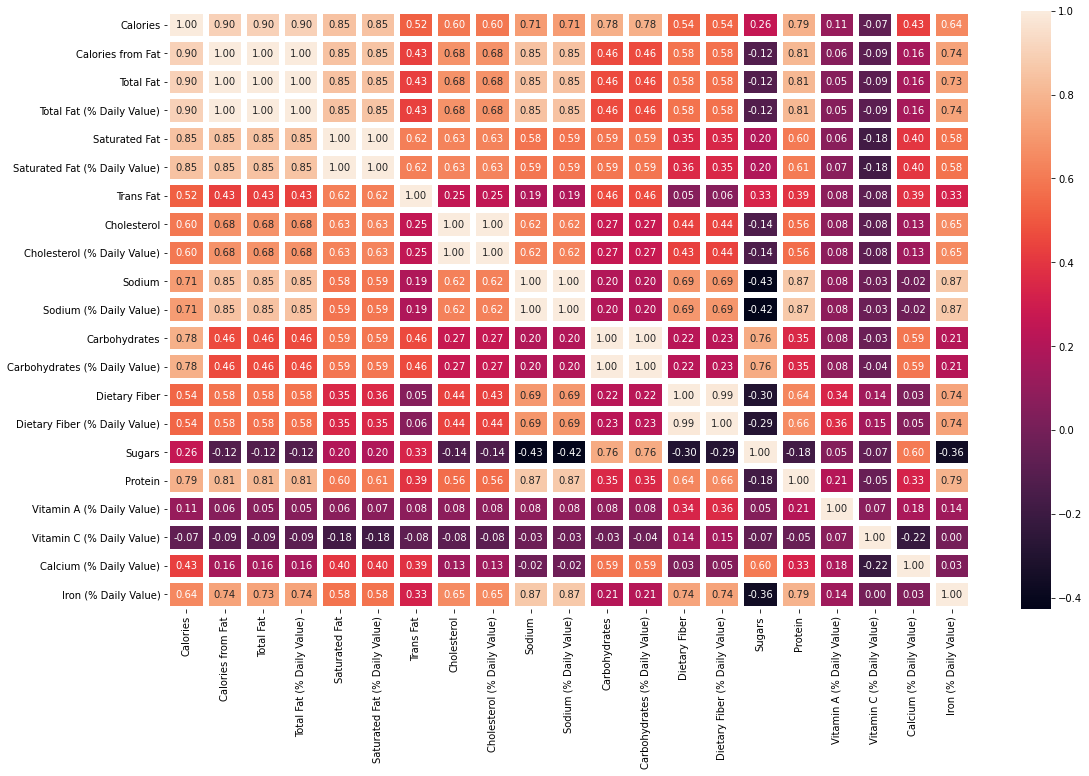

In [20]:
f,ax=plt.subplots(figsize=(18,11))
sns.heatmap(new_data.corr(),annot=True,linewidths=5,fmt='.2f',ax=ax)